In [11]:
%matplotlib inline

from qiskit.transpiler import CouplingMap
from qiskit import transpile, QuantumCircuit

import utils
import matplotlib.pyplot as plt
import networkx as nx

from qiskit.converters import circuit_to_dag
from qiskit.tools.visualization import dag_drawer

### Test how DAG tracks the virtual qubits layout

A fully connected quantum circuit for demonstration (we need to include final measurements to track the final layout):

In [87]:
num_qubits = 5
qc = QuantumCircuit(num_qubits)
G = nx.complete_graph(num_qubits)
for edge in G.edges:
    qc.cx(*edge)
qc.measure_all()

In [89]:
coupling_map_ring = CouplingMap(couplinglist=utils.diCoupling(nx.cycle_graph(6)))
qc_trans = transpile(qc, coupling_map=coupling_map_ring,basis_gates=['u3', 'cx'], optimization_level=3)
qc_trans.count_ops()

OrderedDict([('cx', 24), ('u3', 16), ('measure', 5), ('barrier', 1)])

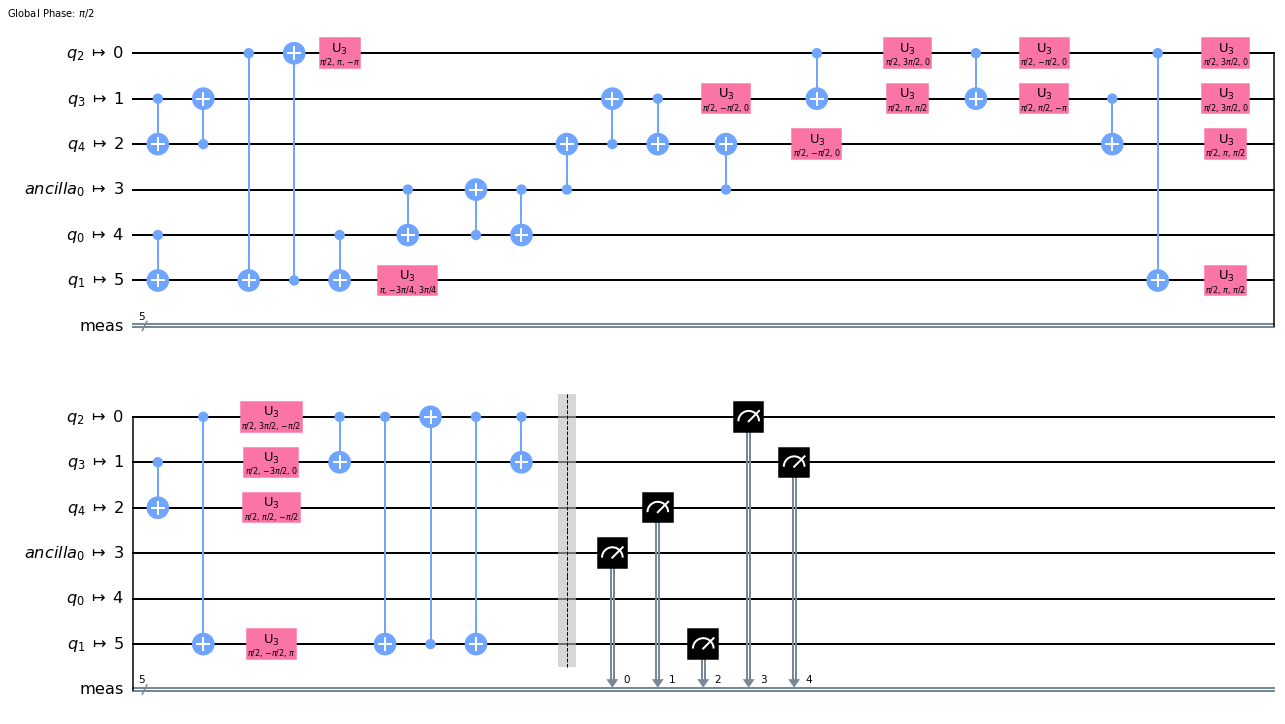

In [90]:
qc_trans.draw('mpl')

The qubit layout at the leftmost of this quantum circuit is the initial layout. The final layout information is in the measurement part.
We can get this information from DAG.

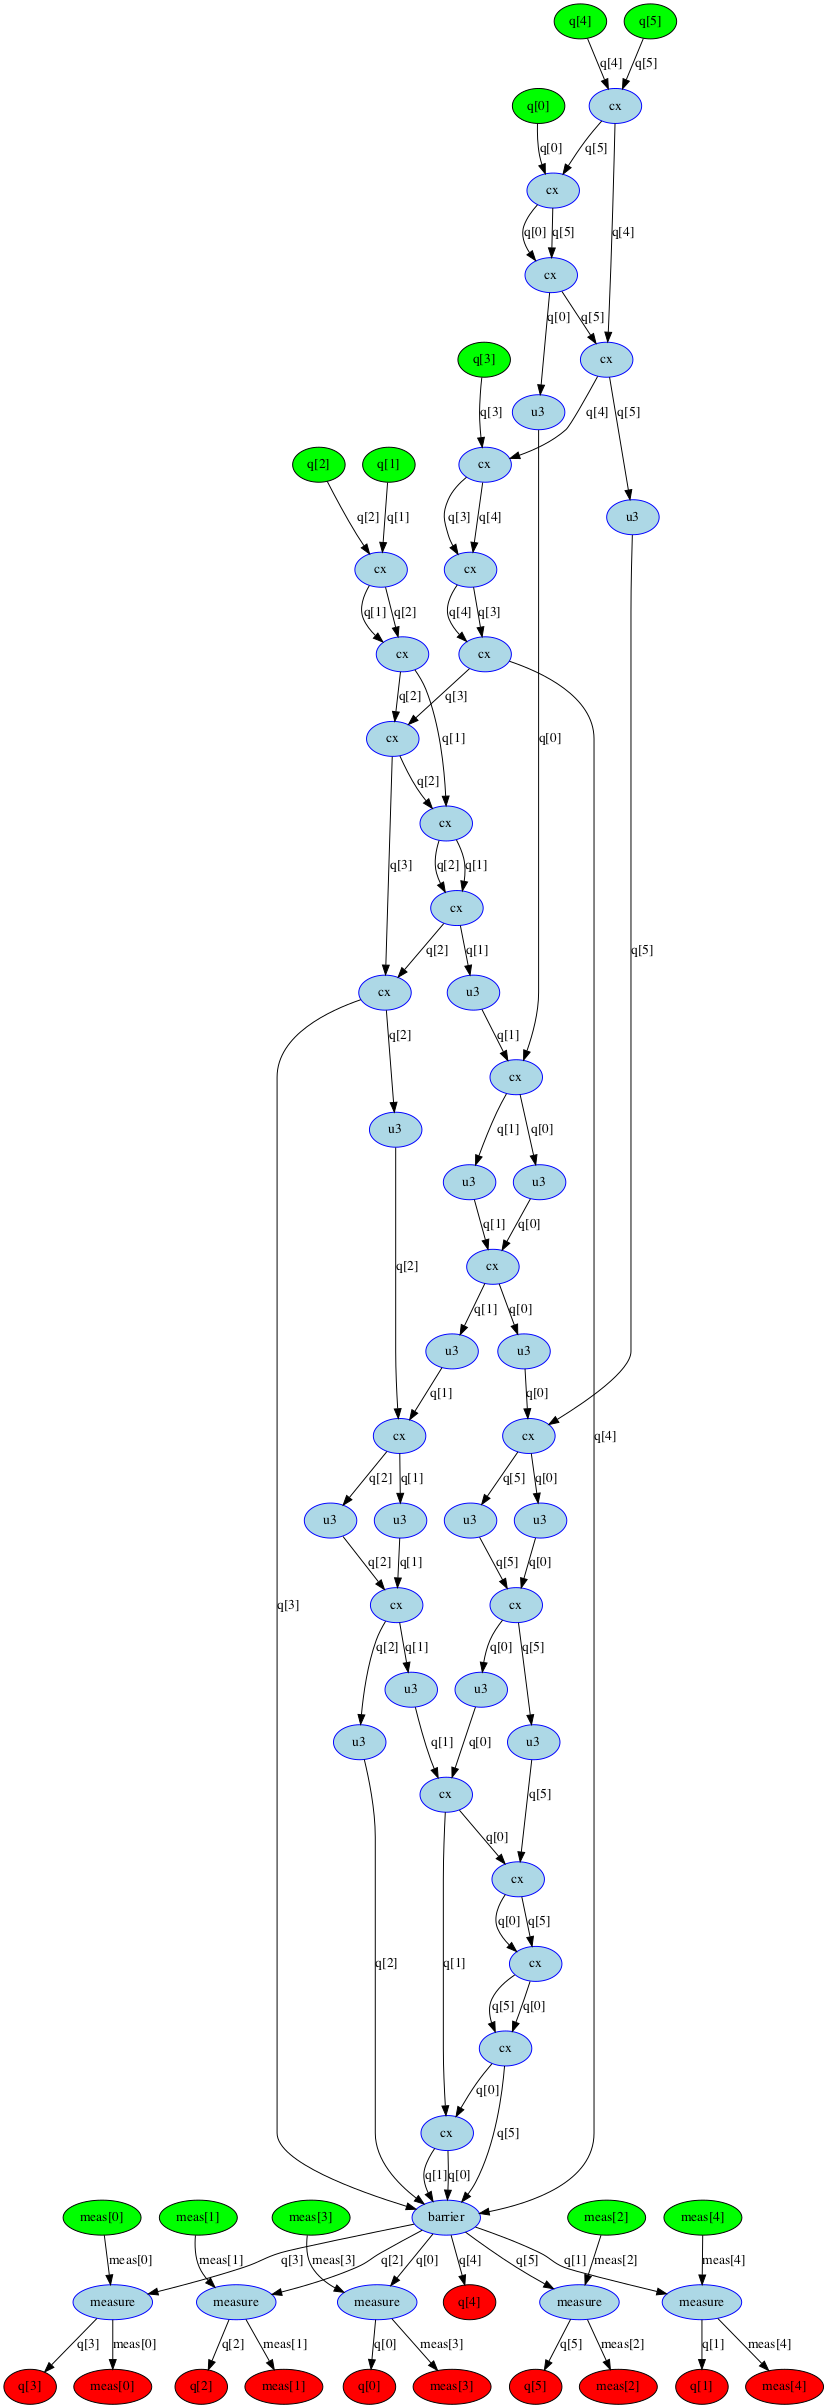

In [92]:
dag = circuit_to_dag(qc_trans)
dag.draw()

We can access the index of classical register and quantum register from the sucessors of each ```measure``` node.
The virtual qubit index and physical qubit index from the same ```measure``` node pair together and form the final layout.

In [94]:
for node in dag.op_nodes():
    if node.name == 'measure':
        children = dag.bfs_successors(node)
        for x in children:
            LChildren = x[1]
            v_index = LChildren[0].wire.index
            p_index = LChildren[1].wire.index

            print("classical/virtual qubits:" + str(v_index))
            print("physical qubits:" + str(p_index))
            print("--------------")

classical/virtual qubits:0
physical qubits:3
--------------
classical/virtual qubits:1
physical qubits:2
--------------
classical/virtual qubits:2
physical qubits:5
--------------
classical/virtual qubits:3
physical qubits:0
--------------
classical/virtual qubits:4
physical qubits:1
--------------


<ipython-input-94-cdb97b12e099>:6: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  v_index = LChildren[0].wire.index
<ipython-input-94-cdb97b12e099>:7: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  p_index = LChildren[1].wire.index
